# **Car Price Prediction using Linear Regression**

**Introduction**


The production rates of cars have been rising progressively during the past decade, with almost 92 million cars
being produced in the year 2019. This has provided the used car market with a big rise which has now come
into picture as a well-growing industry. The recent arrival of various online portals and websites has provided
with the need of the customers, clients, dealers and the sellers to be updated with the current scenario and
trends to know the actual value of any used car in the current market. While there are numerous applications of
machine learning in real life but one of the most pronounced application is it’s use in solving the prediction
problems. Again, there is an end number of topics on which the prediction can be done. This project is very
much focused and based upon one of such application. Making the use of a Machine Learning Algorithm such as
Linear Regression, and try to predict the price of a used car and build a statistical model based on provided
data with a given set of attributes.


**Business Understanding:**

The Kenyan automobile industry is positioned at the intersection of economic growth, urbanization, and shifting consumer preferences. With an increasing population and a rising demand for vehicles, the local automobile company aims to seize market opportunities and overcome challenges by adopting a data-driven approach. Collaborating with an automobile consulting firm, the company seeks comprehensive insights into the multifaceted factors influencing car pricing.


**Problem Statement**
In light of the complex dynamics in the Kenyan automobile industry, the local company faces the challenge of optimizing its pricing based on various independent variables. The primary objective is to develop a predictive model capable of accurately estimating car prices by understanding the relationship between car attributes and pricing, providing the company with a strategic advantage in a competitive marketplace.

The key objectives are:

-Identify significant variables that play a role in predicting the price of a car.


-Assess the effectiveness of these variables in describing the price of a car.

Dataset:

#### **Importing the dependencies**

In [456]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import scipy.stats
from scipy.stats import zscore
from numpy import quantile
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro, f_oneway
from statsmodels.stats.stattools import durbin_watson
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [457]:
#loading the csv file into pandas dataframe and inspecting the first 5 rows
cars = pd.read_csv("data\cleaned_cars.csv") #index_col = 0
cars.head() 

,Make,YOM,Color,Used,Transmission,Mileage,Location,Price,City
0,Nissan,2014,Black,Foreign Used,Automatic,136000.0,"Nairobi, Karen",2050000,Nairobi
1,Nissan,2014,Silver,Foreign Used,Automatic,85000.0,"Nairobi, Kilimani",1380000,Nairobi
2,Nissan,2013,Gray,Foreign Used,Automatic,90231.0,"Nairobi, Ridgeways",995000,Nairobi
3,Nissan,2014,White,Foreign Used,Automatic,52000.0,"Nairobi, Jamhuri",2500000,Nairobi
4,Nissan,2014,White,Foreign Used,Automatic,86532.0,"Mombasa, Mombasa CBD",1100000,Mombasa


In [458]:
# check the last 5 rows
cars.tail()

,Make,YOM,Color,Used,Transmission,Mileage,Location,Price,City
45142,Alfa,2015,Black,Foreign Used,Automatic,86532.0,"Nairobi, Kilimani",1800000,Nairobi
45143,Alfa,2016,White,Foreign Used,Automatic,75048.0,"Nairobi, Ridgeways",1500000,Nairobi
45144,Alfa,2002,Red,Kenyan Used,Automatic,72000.0,"Nairobi, Westlands",289000,Nairobi
45145,Alfa,1992,Blue,Kenyan Used,Manual,150000.0,"Nairobi, Karen",300000,Nairobi
45146,Alfa,1987,Red,Kenyan Used,Manual,86532.0,"Kajiado, Ongata Rongai",80000,Kajiado


#### **Data Understanding**

**Make:** Information about the car brand it is a categorical column.

**YOM:** It is the year of manufacture.

**Color**  Physical appearance of the car like black, silver, etc.

**Used:** Has it been used locally,outside or it is brand new.

**Transmission:** is the car automatic, manual, cvt or amt.

**Mileage:** How much the car has driven before.

**Location** shows the area the car is being sold.

**City:** Shows the city the car is sold.

**Price:** The target column. The price of the car is based on the above information.

In [459]:
#checking the number of rows and columns
cars.shape
print("No of rows", cars.shape[0])
print("No of columns", cars.shape[1])

No of rows 45147
No of columns 9


#### **Get information about our dataset like the total number of rows, total number of columns, data type of each column and memory requirement**

In [460]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45147 entries, 0 to 45146
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          45147 non-null  object 
 1   YOM           45147 non-null  int64  
 2   Color         45147 non-null  object 
 3   Used          45147 non-null  object 
 4   Transmission  45147 non-null  object 
 5   Mileage       45147 non-null  float64
 6   Location      45147 non-null  object 
 7   Price         45147 non-null  int64  
 8   City          45147 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 3.1+ MB


In [461]:
#checking the number of missing values
cars.isnull().sum()

Make            0
YOM             0
Color           0
Used            0
Transmission    0
Mileage         0
Location        0
Price           0
City            0
dtype: int64

- No null values spotted.

In [462]:
# Check for duplicates
duplicates = cars.duplicated()
duplicates_count = duplicates.sum()
print("Number of duplicate rows:", duplicates_count)

# Print the rows with duplicates
if duplicates_count > 0:
    duplicate_rows = cars[duplicates]
    print("Duplicate rows:")
    print(duplicate_rows[:5])
else:
    print("No duplicate rows found.")

Number of duplicate rows: 7500
Duplicate rows:
      Make   YOM   Color          Used Transmission  Mileage  \
11  Nissan  2014   White  Foreign Used    Automatic  86532.0   
14  Nissan  2015   Black  Foreign Used    Automatic  86532.0   
22  Nissan  2014  Silver  Foreign Used    Automatic  86532.0   
25  Nissan  2014  Silver  Foreign Used    Automatic  86532.0   
27  Nissan  2014  Silver  Foreign Used    Automatic  86532.0   

                    Location    Price     City  
11      Mombasa, Mombasa CBD  1100000  Mombasa  
14         Nairobi, Kilimani  2550000  Nairobi  
22  Nairobi, Nairobi Central  1150000  Nairobi  
25  Nairobi, Nairobi Central  1150000  Nairobi  
27  Nairobi, Nairobi Central  1150000  Nairobi  


In [463]:
# Specify columns to consider for duplicates
columns_to_check = ['Make', 'YOM', 'Color', 'Location', 'Mileage', 'City', 'Price', 'Used']

# Remove duplicate rows based on specified columns
cars_no_duplicates = cars.drop_duplicates(subset=columns_to_check)

# Verify the removal of duplicates
print("Number of rows after removing duplicates:", len(cars_no_duplicates))



Number of rows after removing duplicates: 37623


#### **Overal statistics about the dataset**

In [465]:
cars.describe()

,YOM,Mileage,Price
count,45147.000000,4.514700e+04,4.514700e+04
mean,2011.738100,9.979353e+04,1.967034e+06
std,4.499485,9.311228e+04,2.015689e+06
min,1957.000000,1.000000e+00,6.000000e+04
25%,2011.000000,7.000000e+04,8.000000e+05
50%,2014.000000,8.653200e+04,1.350000e+06
75%,2014.000000,1.090000e+05,2.350000e+06
max,2021.000000,1.980000e+06,2.840000e+07


# **Exploratory data analysis**

### **Univariate Analysis**

### **A)** Categorical

Inspecting the distribution of make,color,used,transmission and city column

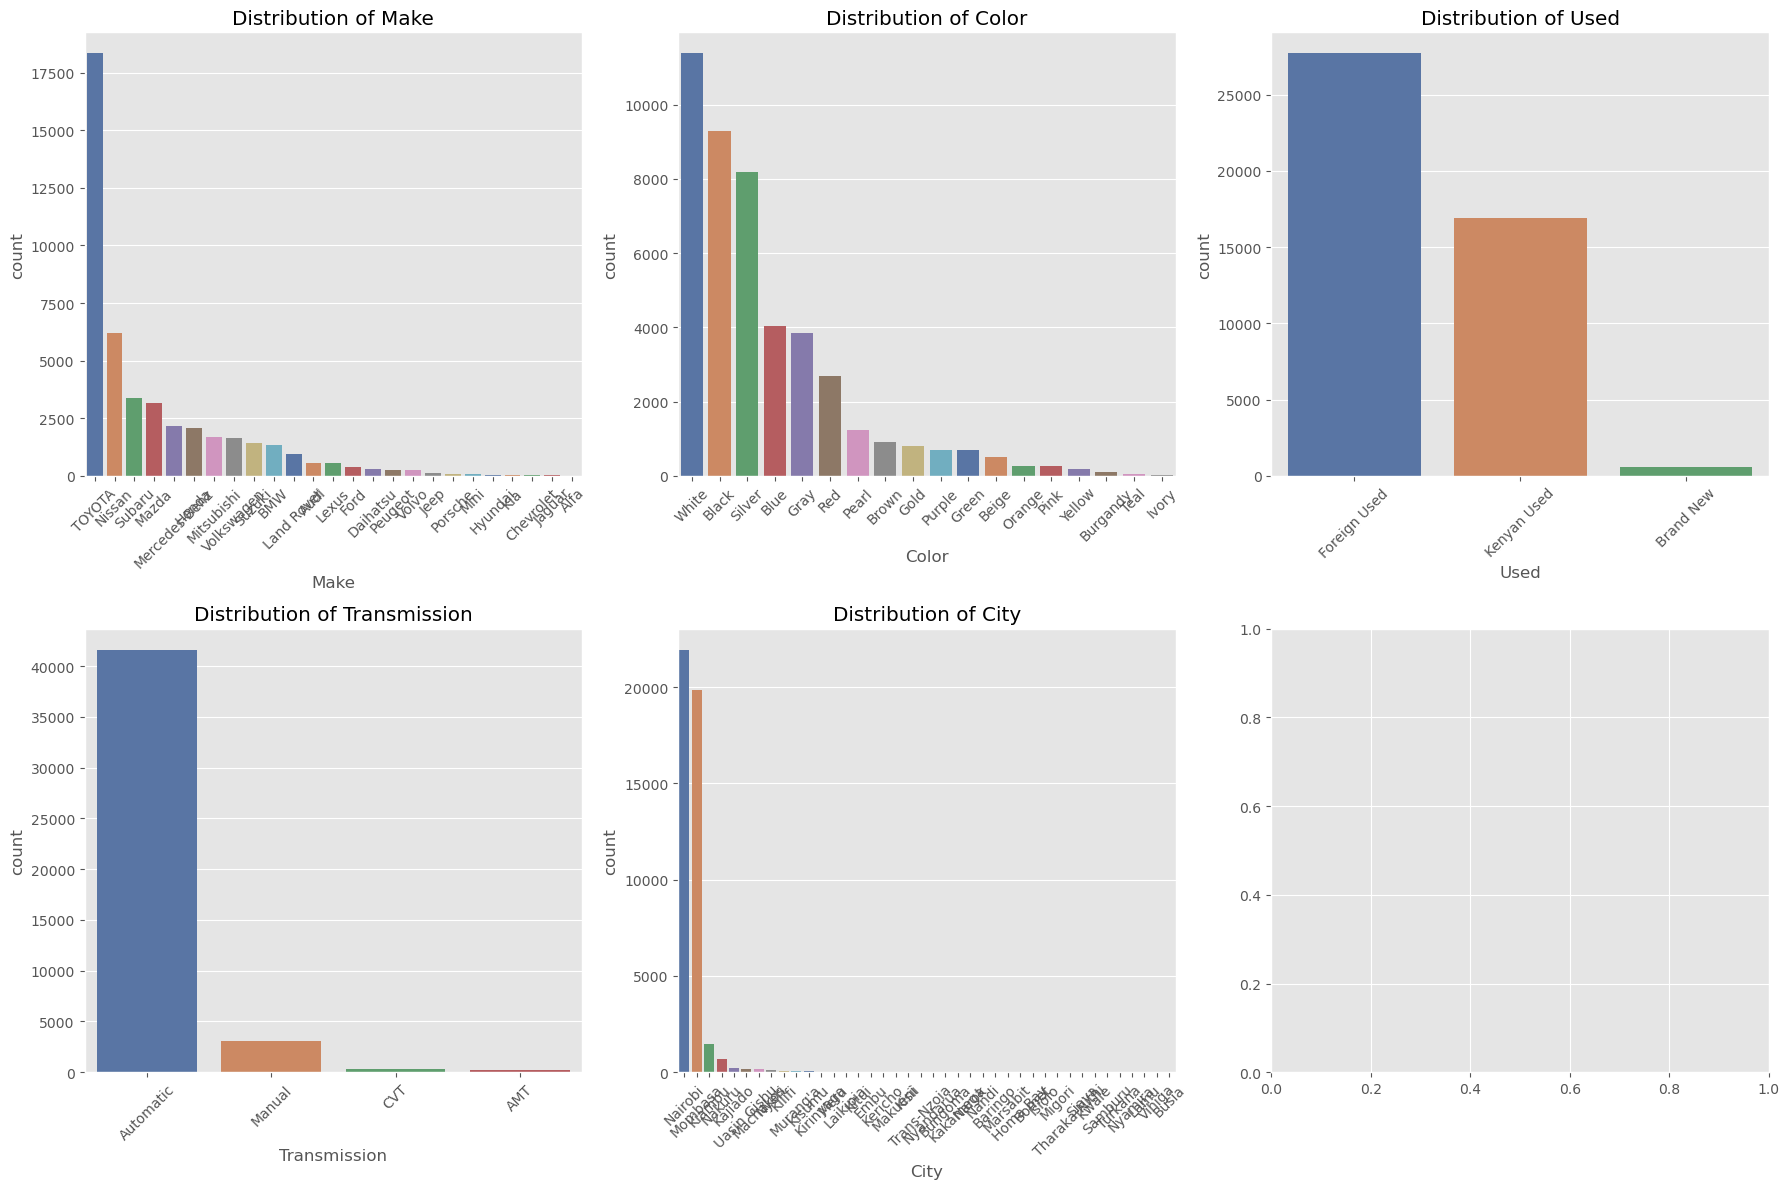

In [467]:
# Create subplots for each variable
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Flatten the axes for easier iteration
axes = axes.flatten()

# List of categorical variables
categorical_variables = ['Make','Color', 'Used', 'Transmission','City']

# Plot distribution for each variable
for i, variable in enumerate(categorical_variables):
    sns.countplot(x=variable, data=cars, ax=axes[i], order=cars[variable].value_counts().index, palette='deep')  # Set2 is an example palette
    axes[i].set_title(f'Distribution of {variable}')
    axes[i].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better visibility

# Adjust layout
plt.tight_layout()
# Save the plot as an image
plt.savefig("visuals/distributioncategorical.png")
plt.show()

### **B)** Numerical

-Price

Skewness: 3.578377
Kurtosis: 18.893035


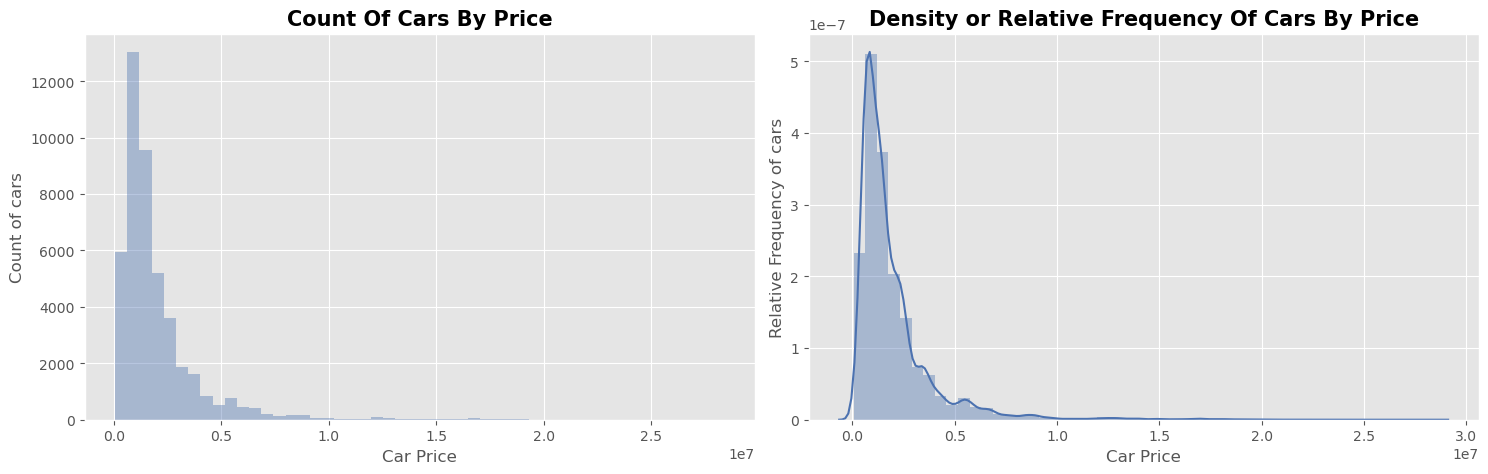

In [468]:
# Set the color palette
sns.set_palette('deep')

# Create subplots for Price distribution
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot count of cars by price
sns.distplot(cars['Price'], norm_hist=False, kde=False, ax=ax[0])
ax[0].set_xlabel('Car Price')
ax[0].set_ylabel('Count of cars', size=12)
ax[0].set_title('Count Of Cars By Price', size=15, weight="bold")

# Plot density or relative frequency of cars by price
sns.distplot(cars['Price'], kde=True, ax=ax[1])
ax[1].set_xlabel('Car Price')
ax[1].set_ylabel('Relative Frequency of cars', size=12)
ax[1].set_title('Density or Relative Frequency Of Cars By Price', size=15, weight="bold")

# Show skewness and kurtosis
print("Skewness: %f" % cars['Price'].skew())
print("Kurtosis: %f" % cars['Price'].kurt())

# Adjust layout
plt.tight_layout()
plt.savefig("visuals/distributionPrice.png")
# Show the plots
plt.show()

The skewness is positive (3.58), indicating a right-skewed distribution, and the kurtosis is high (18.89), indicating heavy tails.

#### Distribution of Mileage and YOM

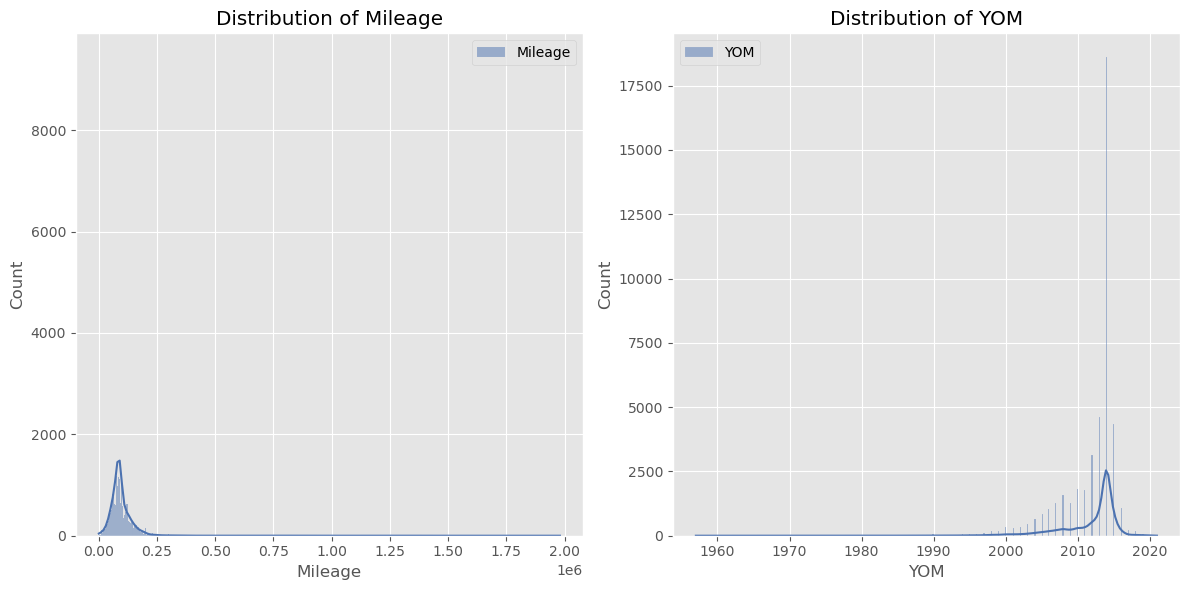

In [469]:
# Set the color palette
sns.set_palette('deep')

# Remove extra space from the column name
cars.rename(columns={'Mileage ': 'Mileage'}, inplace=True)

# Create subplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot histogram for Mileage
sns.histplot(x="Mileage", data=cars, kde=True, label="Mileage", ax=axes[0])
axes[0].set_title('Distribution of Mileage')
axes[0].legend()

# Plot histogram for YOM
sns.histplot(x="YOM", data=cars, kde=True, label="YOM", ax=axes[1])
axes[1].set_title('Distribution of YOM')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.savefig("visuals/distMileYom.png")
# Show the combined plot
plt.show()


#### **Outliers Detection**

Inspect outliers in numeric columns Mileage,Yom and Price

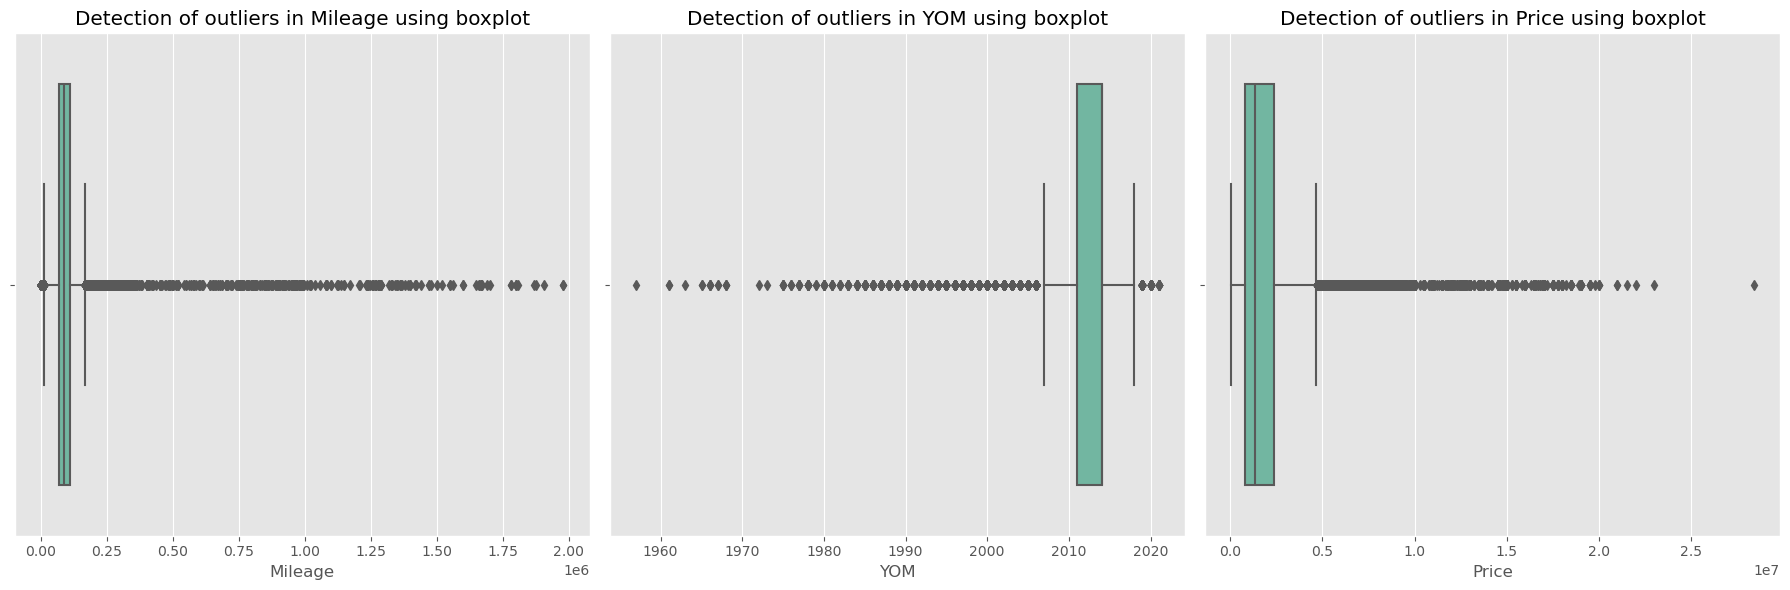

In [488]:
# Define numerical columns
num_col = ["Mileage", "YOM", "Price"]

# Set the color palette to 'Set2'
sns.set_palette('deep')

# Create subplots with one row and multiple columns
fig, axes = plt.subplots(nrows=1, ncols=len(num_col), figsize=(18, 6))

# Iterate through numerical columns
for i, col in enumerate(num_col):
    sns.boxplot(x=cars[col], ax=axes[i], palette='Set2')
    axes[i].set_title("Detection of outliers in {} using boxplot".format(col))
    axes[i].set_xlabel(col)

# Adjust layout
plt.tight_layout()
plt.savefig("visuals/outliers.png")
# Show the plots
plt.show()

In [489]:
# Function to remove outliers based on IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data_no_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_no_outliers

# Remove outliers in 'Price'
cars = remove_outliers_iqr(cars, 'Price')

# Remove outliers in 'YOM'
cars = remove_outliers_iqr(cars, 'YOM')

# Remove outliers in 'Mileage'
cars = remove_outliers_iqr(cars, 'Mileage')


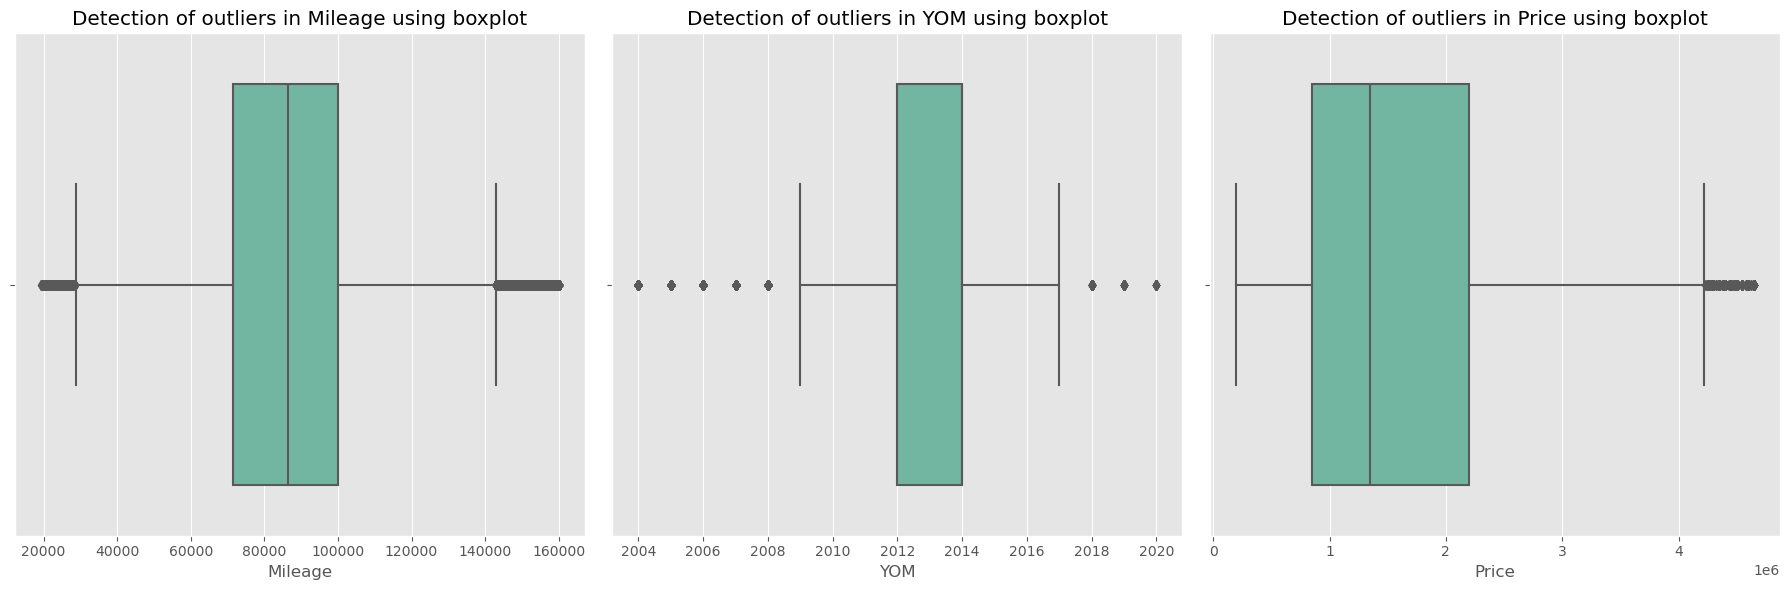

In [490]:
# Define numerical columns
num_col = ["Mileage", "YOM", "Price"]

# Set the color palette to 'Set2'
sns.set_palette('deep')

# Create subplots with one row and multiple columns
fig, axes = plt.subplots(nrows=1, ncols=len(num_col), figsize=(18, 6))

# Iterate through numerical columns
for i, col in enumerate(num_col):
    sns.boxplot(x=cars[col], ax=axes[i], palette='Set2')
    axes[i].set_title("Detection of outliers in {} using boxplot".format(col))
    axes[i].set_xlabel(col)

# Adjust layout
plt.tight_layout()
plt.savefig("visuals/outliers2.png")
# Show the plots
plt.show()

In [361]:
# q= cars['Price'].quantile(q=0.99)
# q

# **Bivariate Analysis**
- Analysis will be done for the target column price with independent features

#### **Used and Price**

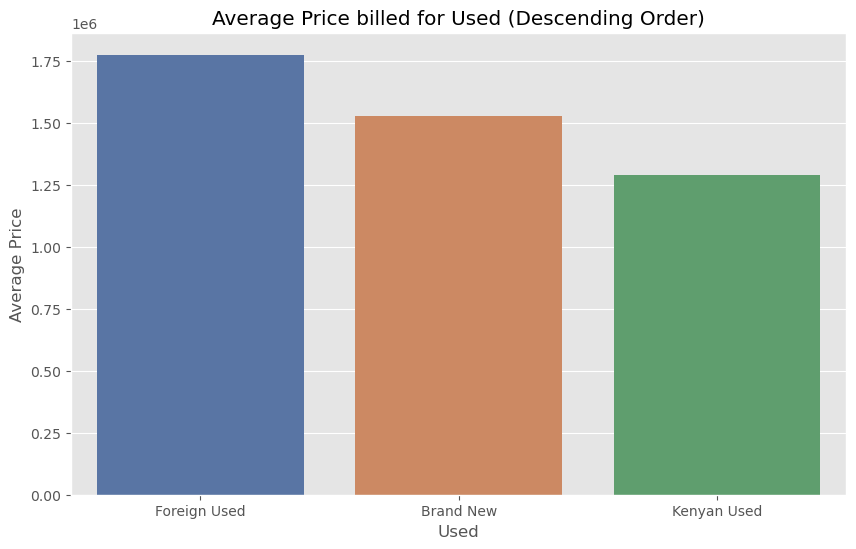

In [492]:
# Calculate the average price for each 'Used' category
average_prices = cars.groupby('Used')['Price'].mean().sort_values(ascending=False)

# Set the color palette to 'Set2'
sns.set_palette('deep')

# Create a bar plot with the 'Used' categories in descending order
plt.figure(figsize=(10, 6))
sns.barplot(x=average_prices.index, y=average_prices.values)

plt.title("Average Price billed for Used (Descending Order)")
plt.xlabel('Used')
plt.ylabel('Average Price')
plt.savefig("visuals/Usedandprice.png")
plt.show()

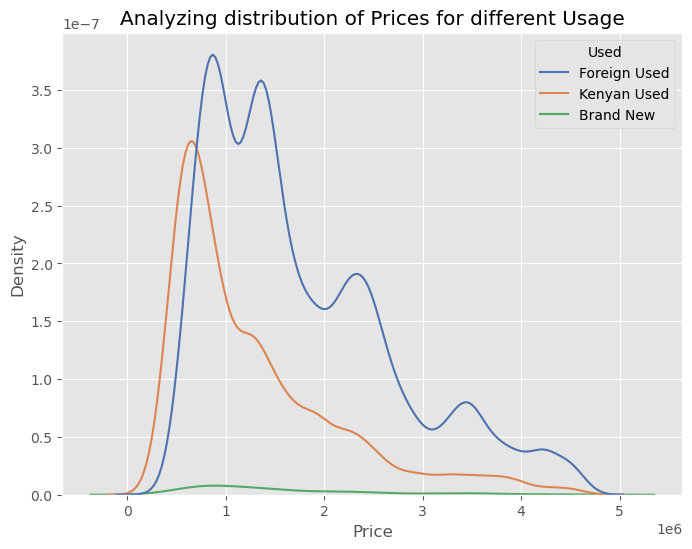

In [493]:
# Set the color palette to 'Set2'
sns.set_palette('deep')

# KDE plot for Price with hue based on 'Used'
plt.figure(figsize=(8, 6))
sns.kdeplot(x="Price", data=cars, hue="Used")

plt.title("Analyzing distribution of Prices for different Usage")
plt.savefig("visuals/Usedandpricedist.png")
plt.show()

#### **Transmission and Price**

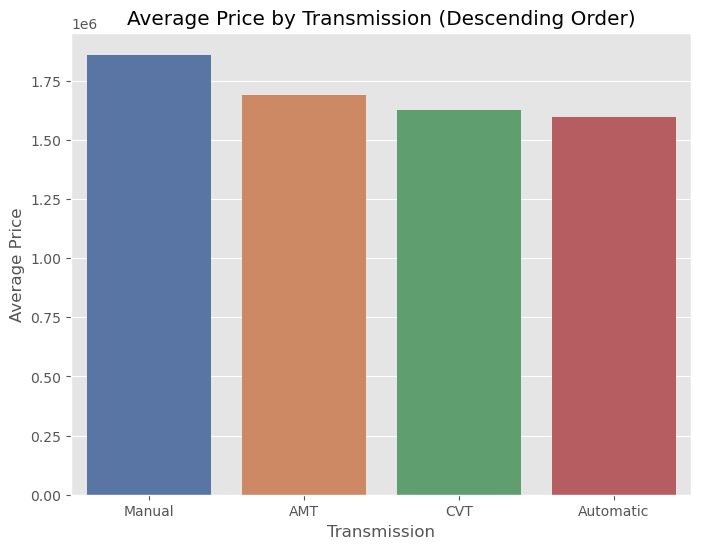

In [494]:
# Calculate the average price for each 'Transmission' category
average_prices = cars.groupby('Transmission')['Price'].mean().sort_values(ascending=False)

# Create a bar plot with the 'Transmission' categories in descending order
plt.figure(figsize=(8, 6))
sns.barplot(x=average_prices.index, y=average_prices.values, palette = 'deep')

plt.title("Average Price by Transmission (Descending Order)")
plt.xlabel('Transmission')
plt.ylabel('Average Price')
plt.savefig("visuals/transmissionandprice.png")
plt.show()

#### **Make and Price**

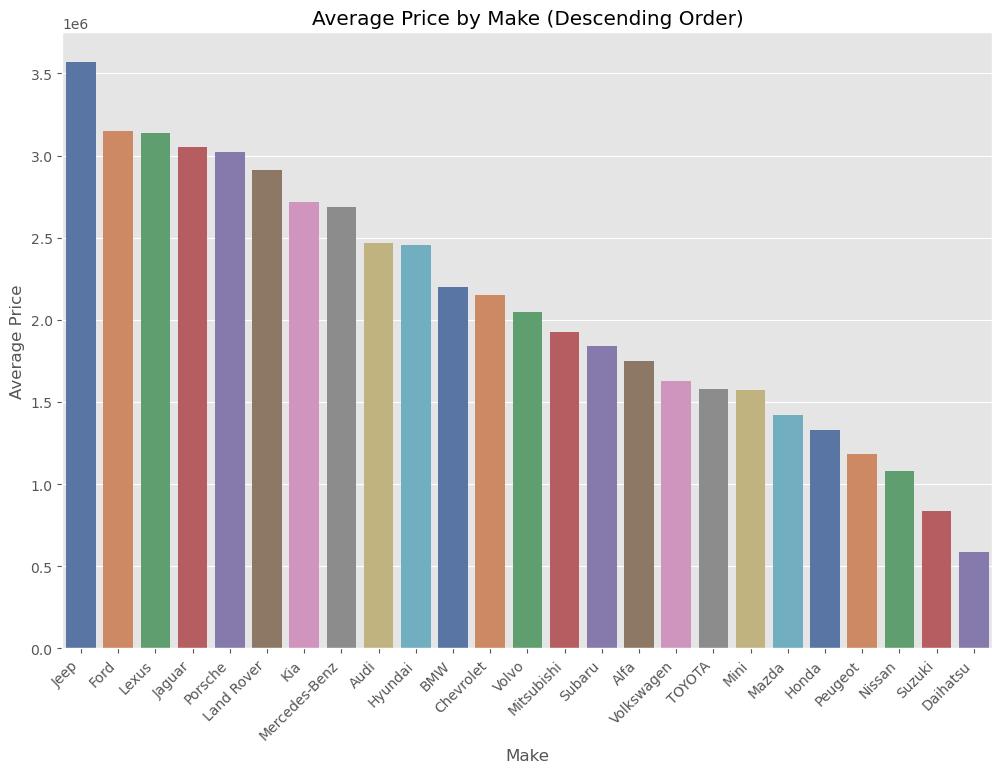

In [495]:
# Calculate the average price for each 'Make' category
average_prices = cars.groupby('Make')['Price'].mean().sort_values(ascending=False)

# Set a larger figure size and higher DPI
plt.figure(figsize=(12, 8), dpi=100)

# Create the bar plot with the 'Make' categories in descending order
sns.barplot(x=average_prices.index, y=average_prices.values, palette="deep",)

plt.title("Average Price by Make (Descending Order)")
plt.xlabel("Make")
plt.ylabel("Average Price")

# Rotate x-axis tick labels by 45 degrees for better readability
plt.xticks(rotation=45, ha="right")
plt.savefig("visuals/makeandprice.png")

# Display the plot
plt.show()

#### **City and Price**

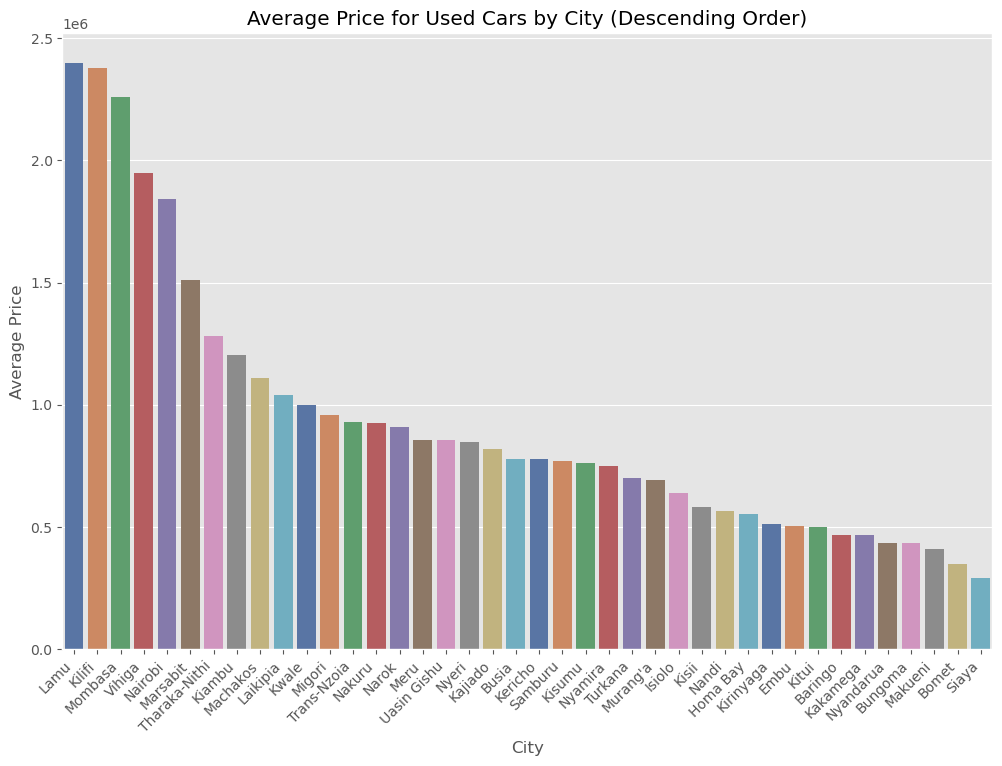

In [478]:

# Set a larger figure size and higher DPI
plt.figure(figsize=(12, 8), dpi=100)

# Create the bar plot with the 'City' categories in descending order
sns.barplot(x="City", y="Price", data=cars, ci=False, palette="deep", order=cars.groupby('City')['Price'].mean().sort_values(ascending=False).index)

plt.title("Average Price for Used Cars by City (Descending Order)")
plt.xlabel("City")
plt.ylabel("Average Price")

# Rotate x-axis tick labels by 45 degrees for better readability
plt.xticks(rotation=45, ha="right")
plt.savefig("visuals/cityandprice.png")
# Display the plot
plt.show()

#### **Color and Price**

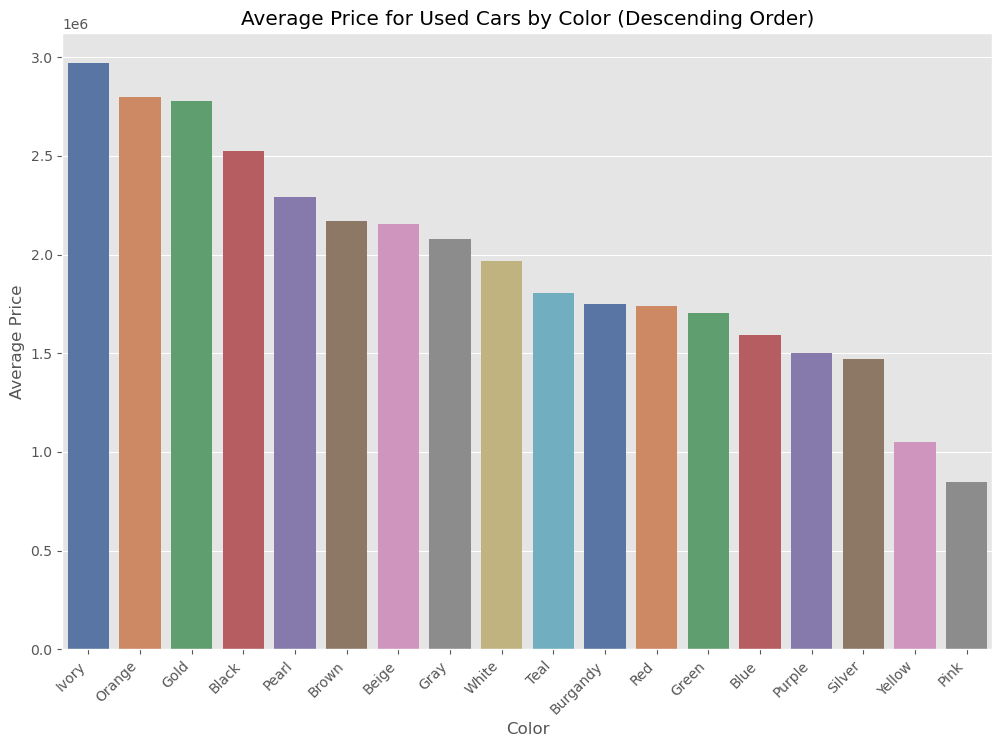

In [479]:
# Calculate the average price for each 'Color' category and sort them in descending order
average_prices = cars.groupby('Color')['Price'].mean().sort_values(ascending=False)

# Set a larger figure size and higher DPI
plt.figure(figsize=(12, 8), dpi=100)

# Create the bar plot with the 'Color' categories in descending order and using the 'Set2' color palette
sns.barplot(x=average_prices.index, y=average_prices.values, palette="deep", order=average_prices.index)

plt.title("Average Price for Used Cars by Color (Descending Order)")
plt.xlabel("Color")
plt.ylabel("Average Price")

# Rotate x-axis tick labels by 45 degrees for better readability
plt.xticks(rotation=45, ha="right")
plt.savefig("visuals/colorandprice.png")

# Display the plot
plt.show()

#### **scatterplots for numeric column and price distribution**

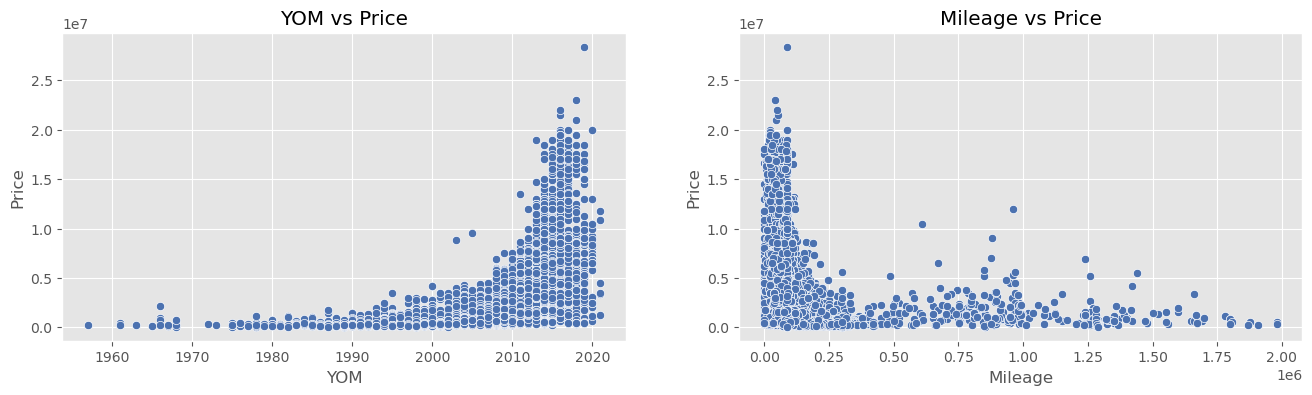

In [480]:
plt.figure(figsize=(16, 4))

# Create the first subplot for YOM vs Price
plt.subplot(1, 2, 1)
sns.scatterplot(x=cars['YOM'], y=cars['Price'], palette='deep')
plt.title("YOM vs Price")

# Create the second subplot for Mileage vs Price
plt.subplot(1, 2, 2)
sns.scatterplot(x=cars['Mileage'], y=cars['Price'], palette='deep')
plt.title("Mileage vs Price")
plt.savefig("visuals/scatternumericandprice.png")
plt.show()



# **Multivariate Analysis**

### Make,Transmission and Price

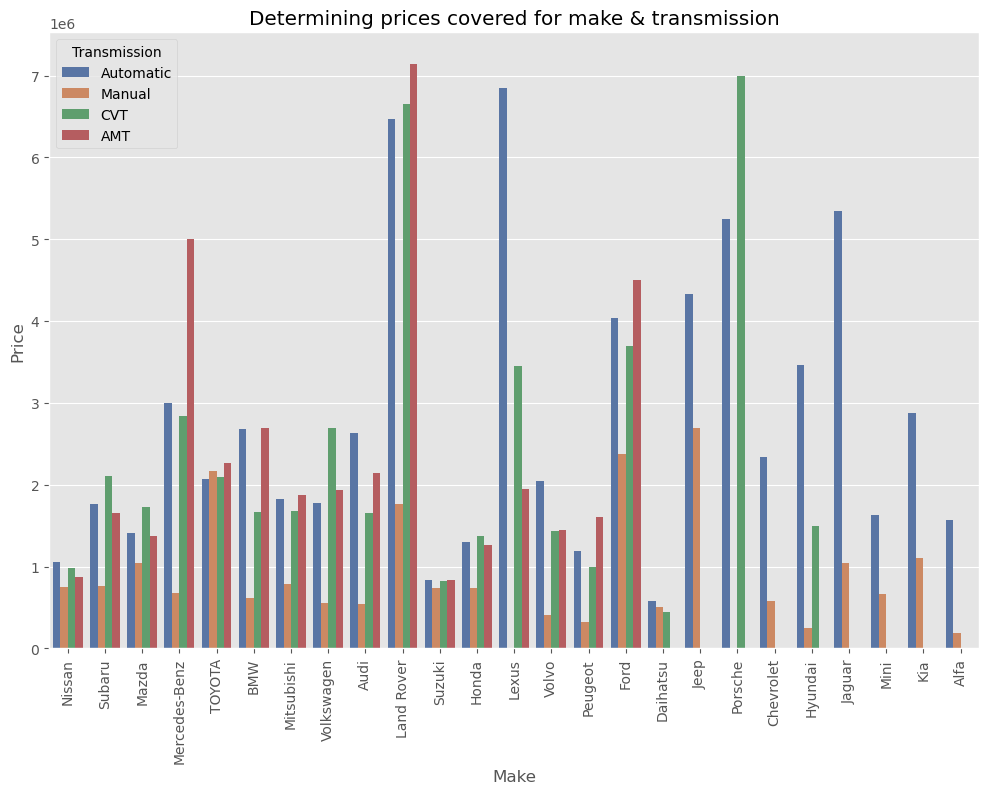

In [481]:
# Set a larger figure size and higher DPI
plt.figure(figsize=(12, 8), dpi=100)

# Create the bar plot
sns.barplot(x="Make", y="Price", data=cars, hue="Transmission", ci=False, palette="deep")
plt.title("Determining prices covered for make & transmission")

# Rotate x-axis tick labels by 90 degrees
plt.xticks(rotation=90)
plt.savefig("visuals/maketransmissionandprice.png")
# Show the plot
plt.show()



### Mileage,Used and Price

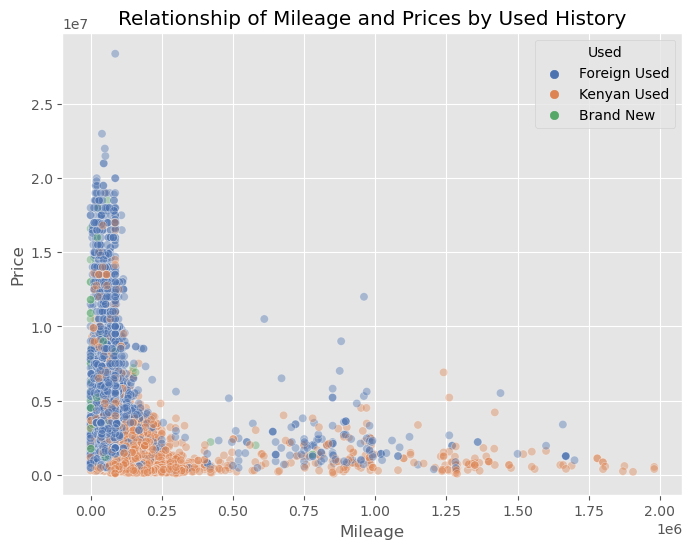

In [378]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Mileage", y="Price", data=cars, hue="Used",palette="deep", alpha=0.4)
plt.title("Relationship of Mileage and Prices by Used History")
plt.show()

## **Chi-Square Statistic:**

The Chi-Square Statistic is a measure of how much the observed counts in the contingency table deviate from what would be expected if there were no association between the variables. A larger Chi-Square Statistic indicates a stronger association.
P-value:

The p-value associated with the Chi-Square Statistic is a measure of the evidence against a null hypothesis of no association. A very low p-value (close to zero) suggests that you reject the null hypothesis, indicating a significant association between the variables.

In [379]:
from scipy.stats import chi2_contingency

# Categorical outcome variable
outcome_variable = 'Price'

# List of categorical variables
categorical_variables = ['Color', 'Used', 'Transmission', 'Make', 'City']

# Create an empty list to store results
chi_square_results = []

# Statistical significance threshold
alpha = 0.05

# Chi-Square Test for Independence for each categorical variable
for cat_var in categorical_variables:
    contingency_table = pd.crosstab(cars[cat_var], cars[outcome_variable])
    
    # Perform Chi-Square Test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # Check for statistical significance
    if p < alpha:
        significance = 'Significant'
    else:
        significance = 'Not Significant'
    
    # Append results to the list
    chi_square_results.append({
        'Variable': f"{cat_var} and {outcome_variable}",
        'Chi-Square Statistic': chi2,
        'P-value': p,
        'Significance': significance
    })

# Convert the list to a DataFrame
chi_square_results_df = pd.DataFrame(chi_square_results)

# Print the results DataFrame
print(chi_square_results_df)


                 Variable  Chi-Square Statistic  P-value Significance
0         Color and Price          34229.709995      0.0  Significant
1          Used and Price          12520.695139      0.0  Significant
2  Transmission and Price          12682.264929      0.0  Significant
3          Make and Price          96506.917775      0.0  Significant
4          City and Price          78558.361627      0.0  Significant


**Color and Price:**

A Chi-Square Statistic of 34229.71 with a p-value of 0.0 indicates a significant association between the 'Color' variable and 'Price.'

**Used and Price:**

A Chi-Square Statistic of 12520.70 with a p-value of 0.0 indicates a significant association between the 'Used' variable and 'Price.'

**Transmission and Price:**

A Chi-Square Statistic of 12682.26 with a p-value of 0.0 indicates a significant association between the 'Transmission' variable and 'Price.'

**Make and Price:**

A Chi-Square Statistic of 96506.92 with a p-value of 0.0 indicates a significant association between the 'Make' variable and 'Price.'


**City and Price:**

A Chi-Square Statistic of 78558.36 with a p-value of 0.0 indicates a significant association between the 'City' variable and 'Price.'


In summary, all the p-values are very close to zero, suggesting that each categorical variable is significantly associated with the 'Price' variable. The Chi-Square Statistic values provide an indication of the strength of these associations with Make is strongly related to price.

# **Encoding Variables**

In [418]:
# Make a copy of the original DataFrame
cars_encoded = cars.copy()

# Columns for Label Encoding
label_encode_cols = ['Make', 'Transmission', 'Used', 'Location', 'City']

# Apply Label Encoding
label_encoder = LabelEncoder()
cars_encoded[label_encode_cols] = cars_encoded[label_encode_cols].apply(label_encoder.fit_transform)

# Columns for One-Hot Encoding
one_hot_encode_cols = ['Color']

# Apply One-Hot Encoding
cars_encoded = pd.get_dummies(cars_encoded, columns=one_hot_encode_cols)

# Log Transformation on the Target Variable ('Price')
cars_encoded['log_price'] = np.log(cars_encoded['Price'])

# Display the first few rows of the encoded DataFrame
print(cars_encoded.head(3))


   Make   YOM  Used  Transmission   Mileage  Location    Price  City  \
0    17  2014     1             1  136000.0       171  2050000    26   
1    17  2014     1             1   85000.0       179  1380000    26   
2    17  2013     1             1   90231.0       203   995000    26   

   log_price  Color_Beige  ...  Color_Ivory  Color_Orange  Color_Pearl  \
0  14.533350        False  ...        False         False        False   
1  14.137594        False  ...        False         False        False   
2  13.810498        False  ...        False         False        False   

   Color_Pink  Color_Purple  Color_Red  Color_Silver  Color_Teal  Color_White  \
0       False         False      False         False       False        False   
1       False         False      False          True       False        False   
2       False         False      False         False       False        False   

   Color_Yellow  
0         False  
1         False  
2         False  

[3 rows x 27 col

In [419]:
# Replace 'False' with 0 and 'True' with 1 in all 'Color' columns
color_columns = [col for col in cars_encoded.columns if col.startswith('Color_')]
cars_encoded[color_columns] = cars_encoded[color_columns].replace({False: 0, True: 1})


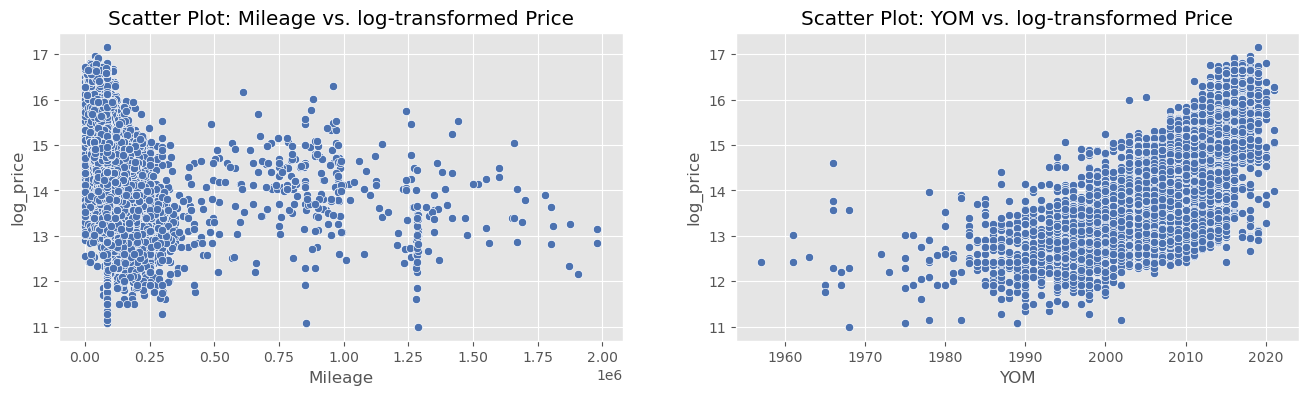

In [420]:
plt.figure(figsize=(16, 4))

# Create the first subplot for YOM vs Price
plt.subplot(1, 2, 1)
sns.scatterplot(x='Mileage', y='log_price', data=cars_encoded, palette='deep')
plt.title('Scatter Plot: Mileage vs. log-transformed Price')
plt.xlabel('Mileage')
plt.ylabel('log_price')

# Create the second subplot for Mileage vs Price
plt.subplot(1, 2, 2)
sns.scatterplot(x='YOM', y='log_price', data=cars_encoded, palette='deep')
plt.title('Scatter Plot: YOM vs. log-transformed Price')
plt.xlabel('YOM')
plt.ylabel('log_price')

plt.show()


In [421]:
cars_encoded.columns

Index(['Make', 'YOM', 'Used', 'Transmission', 'Mileage', 'Location', 'Price',
       'City', 'log_price', 'Color_Beige', 'Color_Black', 'Color_Blue',
       'Color_Brown', 'Color_Burgandy', 'Color_Gold', 'Color_Gray',
       'Color_Green', 'Color_Ivory', 'Color_Orange', 'Color_Pearl',
       'Color_Pink', 'Color_Purple', 'Color_Red', 'Color_Silver', 'Color_Teal',
       'Color_White', 'Color_Yellow'],
      dtype='object')

In [422]:
cars_encoded.head(3)

,Make,YOM,Used,Transmission,Mileage,Location,Price,City,log_price,Color_Beige,...,Color_Ivory,Color_Orange,Color_Pearl,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Teal,Color_White,Color_Yellow
0,17,2014,1,1,136000.0,171,2050000,26,14.533350,0,...,0,0,0,0,0,0,0,0,0,0
1,17,2014,1,1,85000.0,179,1380000,26,14.137594,0,...,0,0,0,0,0,0,1,0,0,0
2,17,2013,1,1,90231.0,203,995000,26,13.810498,0,...,0,0,0,0,0,0,0,0,0,0


In [423]:
# Drop the original 'Price' column
cars_encoded.drop('Price', axis=1, inplace=True)

In [426]:
def calculate_vif(data_frame):
    variables = data_frame.values
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(variables, i) for i in range(data_frame.shape[1])]
    return vif_data

# Select columns for VIF analysis
columns =['Make', 'YOM', 'Used', 'Transmission', 'Mileage', 'Location', 'City','log_price', 'Color_Beige', 
           'Color_Black', 'Color_Blue', 'Color_Brown', 'Color_Burgandy', 'Color_Gold', 'Color_Gray', 
           'Color_Green', 'Color_Ivory', 'Color_Orange', 'Color_Pearl', 'Color_Pink', 
           'Color_Purple', 'Color_Red', 'Color_Silver', 'Color_Teal', 'Color_White', 'Color_Yellow']

# Create a DataFrame with numeric variables
numeric_data = cars_encoded[columns]

# Calculate and display VIF
vif_result = calculate_vif(numeric_data)
print(vif_result)


          Variable            VIF
0             Make       1.023550
1              YOM       2.155616
2             Used       1.855733
3     Transmission       1.185893
4          Mileage       1.098776
5         Location       3.702029
6             City       3.498968
7        log_price       1.469314
8      Color_Beige    4689.663073
9      Color_Black   87175.283592
10      Color_Blue   37834.479825
11     Color_Brown    8663.726511
12  Color_Burgandy     882.375395
13      Color_Gold    7458.191827
14      Color_Gray   36000.327920
15     Color_Green    6408.126118
16     Color_Ivory     300.869782
17    Color_Orange    2455.696134
18     Color_Pearl   11559.402827
19      Color_Pink    2440.823921
20    Color_Purple    6490.256230
21       Color_Red   25214.528927
22    Color_Silver   76785.875808
23      Color_Teal     460.274403
24     Color_White  106660.133601
25    Color_Yellow    1630.206842


VIF values for 'YOM' and 'Mileage' are both around 2, which suggests that these variables are not highly correlated with each other. This is a good sign, and you can proceed with the model-building process.

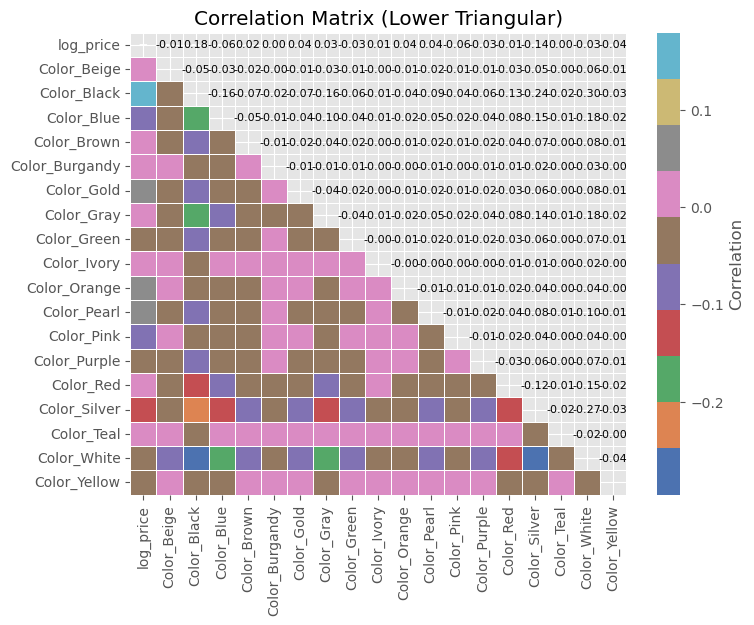

In [430]:
# Select relevant columns for correlation analysis
correlation_columns = ['log_price', 'Color_Beige', 'Color_Black', 'Color_Blue', 'Color_Brown',
                        'Color_Burgandy', 'Color_Gold', 'Color_Gray', 'Color_Green', 'Color_Ivory',
                        'Color_Orange', 'Color_Pearl', 'Color_Pink', 'Color_Purple', 'Color_Red',
                        'Color_Silver', 'Color_Teal', 'Color_White', 'Color_Yellow']

# Create a subset of the DataFrame with the selected columns
correlation_subset = cars_encoded[correlation_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_subset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))
# Use a deep seaborn color palette
deep_palette = sns.color_palette("deep")
# Draw the heatmap with the mask and correct aspect ratio
# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(correlation_matrix, mask=mask, cmap=deep_palette, linewidths=.5, annot=True, fmt=".2f", cbar_kws={'label': 'Correlation'})

# Add annotations manually
for i in range(len(correlation_matrix)):
    for j in range(i + 1, len(correlation_matrix)):
        text = f"{correlation_matrix.iloc[i, j]:.2f}"
        heatmap.text(j + 0.5, i + 0.5, text, ha='center', va='center', fontsize=8, color='black')

plt.title("Correlation Matrix (Lower Triangular)")
plt.show()

Color_Beige: A very small negative correlation (-0.01) with 'log_price'.
Color_Black: A small positive correlation (0.18) with 'log_price'.
Color_Blue: A small negative correlation (-0.06) with 'log_price'.
Color_Brown: A very small positive correlation (0.02) with 'log_price'.
Color_Burgandy: A negligible positive correlation (0.00) with 'log_price'.
Color_Gold: A small positive correlation (0.04) with 'log_price'.
Color_Gray: A small positive correlation (0.03) with 'log_price'.
Color_Green: A small negative correlation (-0.03) with 'log_price'.
Color_Ivory: A very small positive correlation (0.01) with 'log_price'.
Color_Orange: A small positive correlation (0.04) with 'log_price'.
Color_Pearl: A small positive correlation (0.04) with 'log_price'.
Color_Pink: A very small negative correlation (-0.06) with 'log_price'.
Color_Purple: A small negative correlation (-0.03) with 'log_price'.
Color_Red: A very small negative correlation (-0.01) with 'log_price'.
Color_Silver: A small negative correlation (-0.14) with 'log_price'.
Color_Teal: A negligible positive correlation (0.00) with 'log_price'.
Color_White: A small negative correlation (-0.03) with 'log_price'.
Color_Yellow: A small negative correlation (-0.04) with 'log_price'.

# Analysis Of Variance Test (ANOVA) 
Test whether the means of two or more independent samples are significantly different from dependent sample

In the context of the ANOVA tests:

If the p-value is less than or equal to the significance level (commonly 0.05), you would reject the null hypothesis.
If the p-value is greater than the significance level, you would fail to reject the null hypothesis.

Test whether the means of two independent samples are significantlly different from dependent sample.

### Interpretation

- Make:

Null Hypothesis (H0): There is no significant difference in the mean "Price" across different car makes.
Alternative Hypothesis (H1): There is a significant difference in the mean "Price" across different car makes.
Color:

Null Hypothesis (H0): There is no significant difference in the mean "Price" across different car colors.
Alternative Hypothesis (H1): There is a significant difference in the mean "Price" across different car colors.
Used:

Null Hypothesis (H0): There is no significant difference in the mean "Price" between used cars and other categories.
Alternative Hypothesis (H1): There is a significant difference in the mean "Price" between used cars and other categories.
Transmission:

Null Hypothesis (H0): There is no significant difference in the mean "Price" across different transmission types.
Alternative Hypothesis (H1): There is a significant difference in the mean "Price" across different transmission types.

In [432]:
# Perform one-way ANOVA for categorical variables
for categorical_column in ["Make",'Mileage', "Used", "Transmission"]:
    grouped_data = cars_encoded.groupby(categorical_column)["log_price"].apply(list)
    f_statistic, p_value = f_oneway(*grouped_data)
    print(f"ANOVA results for {categorical_column}: F-statistic = {f_statistic}, p-value = {p_value}")

ANOVA results for Make: F-statistic = 577.9591076517235, p-value = 0.0
ANOVA results for Mileage: F-statistic = 2.2251605864043373, p-value = 0.0
ANOVA results for Used: F-statistic = 4085.9496217349097, p-value = 0.0
ANOVA results for Transmission: F-statistic = 286.49684966159145, p-value = 3.04753948109424e-184


Make:

F-statistic = 577.96: The F-statistic is a measure of the ratio of variance between groups to the variance within groups. In the case of "Make," a higher F-statistic suggests that there are significant differences in the log_price means between different car makes.
p-value = 0.0: The p-value is the probability of obtaining the observed results (or more extreme) if the null hypothesis is true. In this case, the p-value is very close to zero (p < 0.05), indicating strong evidence against the null hypothesis. Therefore, there are significant differences in log_price means between at least two car makes.
Mileage:

F-statistic = 2.23: The F-statistic for "Mileage" is relatively low compared to the other variables. However, it is still statistically significant.
p-value = 0.0: The low p-value indicates that there are significant differences in log_price means based on mileage categories.
Used:

F-statistic = 4085.95: The very high F-statistic for "Used" suggests significant differences in log_price means between used and non-used cars.
p-value = 0.0: The low p-value reinforces that there are significant differences in log_price means between used and non-used cars.
Transmission:

F-statistic = 286.50: The F-statistic for "Transmission" is also high, indicating significant differences in log_price means based on transmission types.
p-value = 3.05e-184: The extremely low p-value provides strong evidence against the null hypothesis, indicating significant differences in log_price means between different transmission types.
Summary:

For all categorical variables, the low p-values suggest that there are significant differences in log_price means across different categories.
These results imply that the categorical variables ("Make," "Mileage," "Used," "Transmission") have a statistically significant impact on log_price, and the differences in log_price are not due to random chance.

In [259]:
cars.City.unique()

array(['Nairobi', 'Mombasa', 'Kiambu', 'Machakos', 'Nyeri', 'Uasin Gishu',
       'Nakuru', 'Isiolo', 'Kericho', 'Lamu', 'Kisumu', 'Kajiado',
       'Kilifi', 'Narok', "Murang'a", 'Kakamega', 'Embu', 'Kirinyaga',
       'Kitui', 'Trans-Nzoia', 'Laikipia', 'Meru', 'Makueni', 'Marsabit',
       'Bungoma', 'Nyandarua', 'Bomet', 'Busia', 'Kisii', 'Migori',
       'Baringo', 'Siaya', 'Turkana', 'Homa Bay', 'Nyamira', 'Nandi',
       'Vihiga', 'Kwale', 'Samburu', 'Tharaka-Nithi'], dtype=object)

Null Hypothesis (H0): The mean prices are equal across all locations.

Alternative Hypothesis (H1): At least one location has a different mean price.

In [434]:
# Get unique locations from the 'City' column
locations = cars_encoded['City'].unique()

# Create a dictionary to store prices for each location
location_prices = {location: cars_encoded[cars_encoded['City'] == location]['log_price'] for location in locations}

# Perform ANOVA
f_statistic, p_value = f_oneway(*location_prices.values())

# Print ANOVA results
print(f"ANOVA results for Location: F-statistic = {f_statistic}, p-value = {p_value}")

ANOVA results for Location: F-statistic = 106.06504159858852, p-value = 0.0


ANOVA results for Location:
F-statistic = 106.07: The F-statistic is a measure of the ratio of variance between groups to the variance within groups. A higher F-statistic suggests that there are significant differences in the log prices of cars across different locations.
p-value = 0.0: The p-value is very close to zero (p < 0.05), indicating strong evidence against the null hypothesis. This suggests that there are significant differences in log prices across at least two city locations.
Interpretation:

The ANOVA results provide strong statistical evidence that the location (city) has a significant impact on the log prices of cars.
The differences in log prices are not likely due to random chance, and there are meaningful variations in log prices across different cities.
In practical terms, if you are considering the impact of city location on the log prices of cars, the ANOVA results suggest that the city variable is an important factor, and the differences observed in log prices are statistically significant.








In [437]:
# Check the data types of columns after encoding
print(cars_encoded.dtypes)

Make                int32
YOM                 int64
Used                int32
Transmission        int32
Mileage           float64
Location            int32
City                int32
log_price         float64
Color_Beige         int64
Color_Black         int64
Color_Blue          int64
Color_Brown         int64
Color_Burgandy      int64
Color_Gold          int64
Color_Gray          int64
Color_Green         int64
Color_Ivory         int64
Color_Orange        int64
Color_Pearl         int64
Color_Pink          int64
Color_Purple        int64
Color_Red           int64
Color_Silver        int64
Color_Teal          int64
Color_White         int64
Color_Yellow        int64
dtype: object


In [438]:
cars_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45147 entries, 0 to 45146
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Make            45147 non-null  int32  
 1   YOM             45147 non-null  int64  
 2   Used            45147 non-null  int32  
 3   Transmission    45147 non-null  int32  
 4   Mileage         45147 non-null  float64
 5   Location        45147 non-null  int32  
 6   City            45147 non-null  int32  
 7   log_price       45147 non-null  float64
 8   Color_Beige     45147 non-null  int64  
 9   Color_Black     45147 non-null  int64  
 10  Color_Blue      45147 non-null  int64  
 11  Color_Brown     45147 non-null  int64  
 12  Color_Burgandy  45147 non-null  int64  
 13  Color_Gold      45147 non-null  int64  
 14  Color_Gray      45147 non-null  int64  
 15  Color_Green     45147 non-null  int64  
 16  Color_Ivory     45147 non-null  int64  
 17  Color_Orange    45147 non-null 

In [439]:
cars_encoded.isnull().sum()

Make              0
YOM               0
Used              0
Transmission      0
Mileage           0
Location          0
City              0
log_price         0
Color_Beige       0
Color_Black       0
Color_Blue        0
Color_Brown       0
Color_Burgandy    0
Color_Gold        0
Color_Gray        0
Color_Green       0
Color_Ivory       0
Color_Orange      0
Color_Pearl       0
Color_Pink        0
Color_Purple      0
Color_Red         0
Color_Silver      0
Color_Teal        0
Color_White       0
Color_Yellow      0
dtype: int64

# Correlation Test
### Pearson's Correlation Coefficient
- Test whether two samples have a linear relationship

H0 : The color and prices are independent

H1 : There is a dependency between the color and prices

In [440]:
# List of color columns
color_columns = ['Color_Beige', 'Color_Black', 'Color_Blue', 'Color_Brown', 'Color_Burgandy', 'Color_Gold',
                  'Color_Gray', 'Color_Green', 'Color_Ivory', 'Color_Orange', 'Color_Pearl', 'Color_Pink',
                  'Color_Purple', 'Color_Red', 'Color_Silver', 'Color_Teal', 'Color_White', 'Color_Yellow']

# Iterate through each color column and perform the correlation test
for color_column in color_columns:
    color = cars_encoded[color_column].values
    prices = cars_encoded["log_price"].values

    # Calculate the Pearson correlation coefficient and p-value
    correlation_coefficient, p_value = pearsonr(color, prices)

    # Check the p-value and print the result
    print(f"For color {color_column}:")
    if p_value > 0.05:
        print(f"Pearson's correlation coefficient: {correlation_coefficient}")
        print("We cannot reject the null hypothesis. Color and Price are not dependent and have no linear relationship.")
    else:
        print(f"Pearson's correlation coefficient: {correlation_coefficient}")
        print("We reject the null hypothesis. Color and Price are dependent and have a linear relationship.")
    print("\n")

For color Color_Beige:
Pearson's correlation coefficient: -0.00914420394789004
We cannot reject the null hypothesis. Color and Price are not dependent and have no linear relationship.


For color Color_Black:
Pearson's correlation coefficient: 0.17914773451390706
We reject the null hypothesis. Color and Price are dependent and have a linear relationship.


For color Color_Blue:
Pearson's correlation coefficient: -0.06146544814524512
We reject the null hypothesis. Color and Price are dependent and have a linear relationship.


For color Color_Brown:
Pearson's correlation coefficient: 0.020436183954195514
We reject the null hypothesis. Color and Price are dependent and have a linear relationship.


For color Color_Burgandy:
Pearson's correlation coefficient: 0.0007348565824294917
We cannot reject the null hypothesis. Color and Price are not dependent and have no linear relationship.


For color Color_Gold:
Pearson's correlation coefficient: 0.03878093234628252
We reject the null hypothes

In [442]:
# Extract relevant columns
yom = cars_encoded['YOM']
mileage = cars_encoded['Mileage']
price = cars_encoded['log_price']

# Calculate the correlation coefficients and p-values
corr_yom_price, p_yom_price = pearsonr(yom, price)
corr_mileage_price, p_mileage_price = pearsonr(mileage, price)

# Print the results
print(f'Correlation between YOM and Price: {corr_yom_price:.4f}, p-value: {p_yom_price:.4f}')
print(f'Correlation between Mileage and Price: {corr_mileage_price:.4f}, p-value: {p_mileage_price:.4f}')

Correlation between YOM and Price: 0.5088, p-value: 0.0000
Correlation between Mileage and Price: -0.1962, p-value: 0.0000


Correlation between YOM and Price:

Correlation Coefficient (r) = 0.5088: This positive correlation coefficient suggests a moderate positive linear relationship between the Year of Manufacture (YOM) and the Price of cars. As the Year of Manufacture increases, the Price tends to increase as well.
p-value = 0.0000: The p-value is very close to zero (p < 0.05), indicating that the correlation is statistically significant. This means that it's highly unlikely to observe such a correlation by random chance.
Interpretation:

Newer cars (higher YOM) tend to have higher prices, indicating that buyers are willing to pay more for recently manufactured vehicles.
Correlation between Mileage and Price:

Correlation Coefficient (r) = -0.1962: This negative correlation coefficient suggests a weak negative linear relationship between Mileage and the Price of cars. As Mileage increases, the Price tends to decrease, but the correlation is not very strong.
p-value = 0.0000: The p-value is very close to zero (p < 0.05), indicating that the correlation is statistically significant. This means that it's highly unlikely to observe such a correlation by random chance.
Interpretation:

There is a weak negative correlation between Mileage and Price. Generally, cars with lower mileage may be priced higher, reflecting the common expectation that lower mileage is associated with less wear and tear.
In summary, the correlation analysis suggests that both Year of Manufacture (YOM) and Mileage are statistically significant factors correlated with the Price of cars. The interpretation provides insights into the direction and strength of these relationships.

In [443]:
mileAge = cars_encoded["Mileage"]
prices = cars_encoded["log_price"]
stat,p = pearsonr(mileAge,prices)
if p > 0.05:
    print(p)
    print("We cannot reject the null hypothesis. Mileage and prices are not dependent and have no linear relationship")
else:
    print(p)
    print("We can reject the null hypothesis. Mileage and Prices are dependent and have linear relationship")

0.0
We can reject the null hypothesis. Mileage and Prices are dependent and have linear relationship


Text(0.5, 1.0, 'Correlation Matrix (Lower Triangular)')

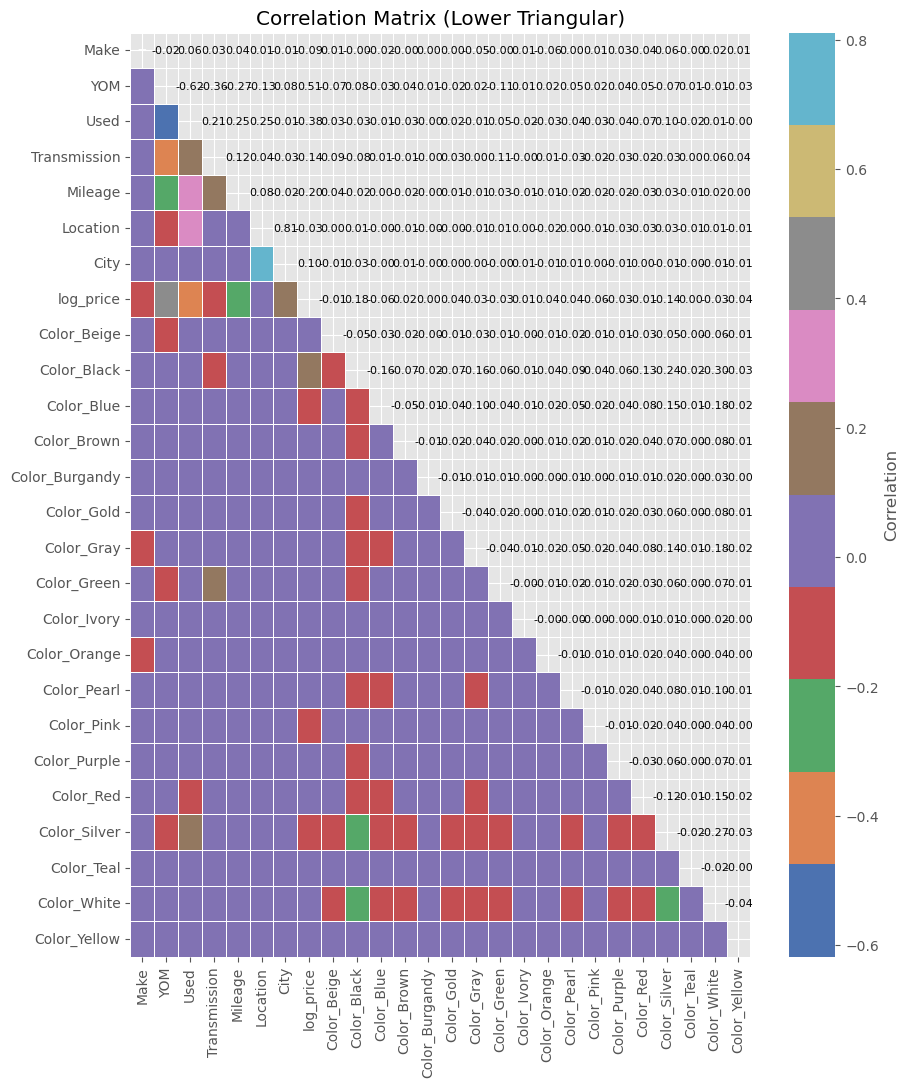

In [446]:
# Calculate the correlation matrix
correlation_matrix = cars_encoded.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 12))
# Use a deep seaborn color palette
deep_palette = sns.color_palette("deep")
# Draw the heatmap with the mask and correct aspect ratio
# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(correlation_matrix, mask=mask, cmap=deep_palette, linewidths=.5, annot=True, fmt=".2f", cbar_kws={'label': 'Correlation'})

# Add annotations manually
for i in range(len(correlation_matrix)):
    for j in range(i + 1, len(correlation_matrix)):
        text = f"{correlation_matrix.iloc[i, j]:.2f}"
        heatmap.text(j + 0.5, i + 0.5, text, ha='center', va='center', fontsize=8, color='black')

plt.title("Correlation Matrix (Lower Triangular)")

# Data Preparation for Machine Learning
- The machine learning algorithms understand only numerical data. In our dataset there are some categorical features which we need to convert into numerical, where each numeric number is a representative of a category. So, in this section we will prepare our data to be fed into machine learning algorithms

- The object columns are Make, YOM, Color, Used, Transmission, Mileage, Location, City and Area. We can replace the unique categorical values in them by integers, where each integer denotes a particular category in that column.

In [447]:
cars_encoded.shape

(45147, 26)

# Machine Learning
- In the section of machine learning we will predict charges by using all the other features. The charges column is a numerical column. So, this machine learning problem is Regression problem which is a type of supervised machine learning 

- We will cover closed form equation that directly computes the model parameters that best fit the model to the training set.

- The regression problem we are going to tackle is a multiple regression as we will give more than one input to get a single output(charges). It is also a univariate regression problem as we are trying to predict a single value. The multivariate regression problem is used when we need to predict more than a single value.

# Linear Regression
- Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

- This form of analysis estimates the coefficients of the linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values.


# Metrics for Performace Evaluation
- Following are the common metrics used to evaluate linear regression model performance.

### Root Mean Squared Error (RMSE)
- RMSE is the square root of the mean of the square of all of the error. RMSE is considered an excellent general-purpose error metric for numerical predictions. RMSE is a good measure of accuracy, but only to compare prediction errors of different models or model configurations for a particular variable and not between variables, as it is scale-dependent. It is the measure of how well a regression line fits the data points. The formula for calculating RMSE is:


- yi^ = Predicted
- yi = Actual
- n = number of obervations

### Mean Absolute Error
- Mean Absolute Error calculates the average difference between the calculated values and actual values. It is also known as scale-dependent accuracy as it calculates error in observations taken on the same scale.It calculates errors between actual values and values predicted by the model. 
- Mean Absolute Error (MAE) is calculated by taking the summation of the absolute difference between the actual and calculated values of each observation over the entire array and then dividing the sum obtained by the number of observations in the array.



- yi = Actual value
- yi^ = predicted value
- n = number of observations

### R-squared error
- R-squared is a goodness of fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. The more the R-squar value the greater the variance is explained by independent variables in the dependent variable




Simple Linear regression
Fomulation of Null and Alternate Hypothesis

H0: There is no relationship between the Year of Manufaccture(YOM) and the car price

H1: There is a relationship between the Year of Manufaccture(YOM) and the car price

In [448]:
# Create a design matrix X by selecting the independent variables/features
X = cars_encoded[['YOM']]

# Add a constant term to the independent variables matrix
X = sm.add_constant(X)

# Create the dependent variable y
y = cars_encoded['log_price']

# Fit the model
baseline_model = sm.OLS(y, X).fit()
# Display the summary
print(baseline_model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                 1.577e+04
Date:                Wed, 31 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:01:10   Log-Likelihood:                -45717.
No. Observations:               45147   AIC:                         9.144e+04
Df Residuals:                   45145   BIC:                         9.146e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -161.8722      1.402   -115.483      0.0

Multiple Linear regression
Fomulation of Null and Alternate Hypothesis

H0: There is no relationship between the car price and all the specified parameters 

H1: There is a relationship between  the car price and all the specified parameters

In [453]:
# Selecting independent variables
X = cars_encoded[['Make','YOM', 'Mileage','Used', 'Transmission','Location', 'City','Color_Beige', 'Color_Black', 'Color_Blue', 'Color_Brown',
                        'Color_Burgandy', 'Color_Gold', 'Color_Gray', 'Color_Green', 'Color_Ivory',
                        'Color_Orange', 'Color_Pearl', 'Color_Pink', 'Color_Purple', 'Color_Red',
                        'Color_Silver', 'Color_Teal', 'Color_White', 'Color_Yellow' ]]

# Adding a constant term to the independent variables matrix
X = sm.add_constant(X)

# Dependent variable
y = cars_encoded['log_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
model = sm.OLS(y_train, X_train).fit()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# Calculate the root mean squared error
rmse = np.sqrt(mse)
# Print the RMSE
print("Root Mean Squared Error (RMSE) for Linear Regression: {}".format(rmse))

# Display the summary of the regression
print(model.summary())

Mean Squared Error: 0.4135335905689336
Root Mean Squared Error (RMSE) for Linear Regression: 0.6430657746832229
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     705.5
Date:                Wed, 31 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:27:18   Log-Likelihood:                -34971.
No. Observations:               36117   AIC:                         6.999e+04
Df Residuals:                   36092   BIC:                         7.020e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------

In [276]:
# Splitting data into features and target
X = cars_encoded.copy()
X.drop("Price", axis=1, inplace=True)
y = cars_encoded["Price"]


In [277]:
# The data contain variables which have different scales so we are standardizing them.
X_scaled = StandardScaler().fit_transform(X)

In [278]:
# splitting data into training and test set
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=21)

In [279]:
# Create a linear regression model
linear_regression_model = LinearRegression()

# Train the model on the training set
linear_regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_regression_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Print the RMSE
print("Root Mean Squared Error (RMSE) for Linear Regression: {}".format(rmse))

Root Mean Squared Error (RMSE) for Linear Regression: 1825660.8385972944


The root mean squared error (RMSE) you've calculated indicates the average difference between the predicted and actual values in your linear regression model. In this case, an RMSE of 1825660.83 suggests that, on average, the model's predictions are off by approximately 1.83 million (considering the unit of your target variable, car prices, is in millions).

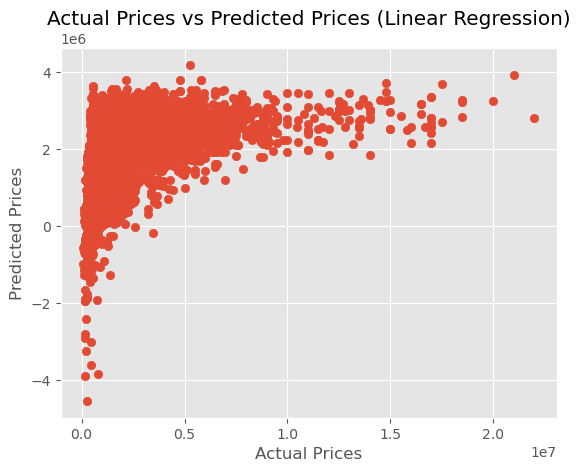

In [280]:
# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices (Linear Regression)")
plt.show()

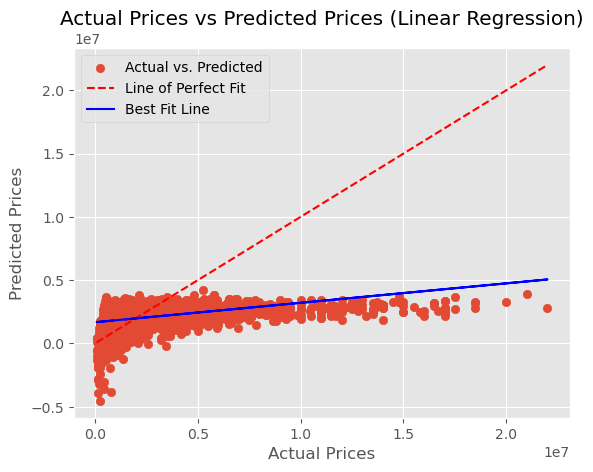

In [281]:
# Plotting actual vs predicted values with the best fit line
plt.scatter(y_test, y_pred, label="Actual vs. Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Line of Perfect Fit')

# Draw the best fit line
plt.plot(y_test, np.polyval(np.polyfit(y_test, y_pred, 1), y_test), color='blue', label='Best Fit Line')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices (Linear Regression)")
plt.legend()
plt.show()

VIF is a measure that quantifies how much a variable is contributing to the standard error in the regression model. In general, a high VIF indicates that the variable may be highly correlated with other variables in the model, which can cause issues like multicollinearity.

Here's how you can interpret the VIF values:

VIF = 1: No correlation between the independent variable and the other variables.
VIF < 5: Moderate correlation; the variable can be included in the model.
VIF > 5: High correlation; the variable should be carefully examined. If the correlation is too high, it might be a candidate for removal to improve the model.

In [282]:
# Define the list of column names for which you want to calculate VIF
columns = ['Make', 'YOM', 'Used', 'Transmission', 'Mileage', 'Location', 'City', 'Color_Beige', 
           'Color_Black', 'Color_Blue', 'Color_Brown', 'Color_Burgandy', 'Color_Gold', 'Color_Gray', 
           'Color_Green', 'Color_Ivory', 'Color_Orange', 'Color_Pearl', 'Color_Pink', 
           'Color_Purple', 'Color_Red', 'Color_Silver', 'Color_Teal', 'Color_White', 'Color_Yellow']

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = columns
vif_data["VIF"] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]

# Display the VIF dataframe
print(vif_data)


          Variable           VIF
0             Make      1.017353
1              YOM      1.869250
2             Used      1.842131
3     Transmission      1.181045
4          Mileage      1.094100
5         Location      3.702010
6             City      3.494132
7      Color_Beige   4167.954057
8      Color_Black  77493.855922
9       Color_Blue  33611.548199
10     Color_Brown   7699.135700
11  Color_Burgandy    784.191838
12      Color_Gold   6630.461871
13      Color_Gray  31993.224563
14     Color_Green   5694.204011
15     Color_Ivory    267.562275
16    Color_Orange   2183.052706
17     Color_Pearl  10273.675753
18      Color_Pink   2166.534915
19    Color_Purple   5764.914709
20       Color_Red  22401.357372
21    Color_Silver  68214.520174
22      Color_Teal    409.002724
23     Color_White  94774.720582
24    Color_Yellow   1447.740394


Variables like "Make," "YOM," "Used," "Transmission," and "Mileage" have low VIFs, indicating low correlation with other variables.
Variables like "Location" and "City" have moderate VIFs, suggesting moderate correlation.
Variables related to color, such as "Color_Beige," "Color_Black," etc., have very high VIFs, indicating strong correlation. This might be a result of one-hot encoding, and you may need to consider dropping some color categories to address multicollinearity.

In [283]:
# Define the hyperparameter grid
param_grid = {
    'alpha': [0.1, 1.0, 10.0]
}

# Create the base model
linear_model = Ridge()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=linear_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the final model with the best hyperparameters
final_model = Ridge(**best_params)
final_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_test = final_model.predict(X_test)

# Evaluate performance metrics
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Error (RMSE) on Test Set:", rmse_test)

Best Hyperparameters: {'alpha': 10.0}
Root Mean Squared Error (RMSE) on Test Set: 1825672.3057219342


Previous RMSE: 1,825,660.84
Current RMSE with tuned hyperparameters: 1,825,672.31
The difference is minimal, and it seems that the hyperparameter tuning did not significantly improve the model's performance on the test set.